<a href="https://colab.research.google.com/github/JohnNuwan/TMP-Syst/blob/main/Tuto_Visio_python_%26_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OpenCV**

---
**OpenCV** (pour Open Computer Vision) est une bibliothèque graphique libre, initialement développée par Intel, spécialisée dans le traitement d'images en temps réel. La société de robotique Willow Garage et la société ItSeez se sont succédé au support de cette bibliothèque. Depuis 2016 et le rachat de ItSeez par Intel, le support est de nouveau assuré par Intel.

Cette bibliothèque est distribuée sous licence BSD.

NVidia a annoncé en septembre 2010 qu'il développerait des fonctions utilisant CUDA pour OpenCV7.

---
## **Fonctionnalités**
La bibliothèque OpenCV met à disposition de nombreuses fonctionnalités très diversifiées permettant de créer des programmes en partant des données brutes pour aller jusqu'à la création d'interfaces graphiques basiques.

---

## **Traitement d'images**

Elle propose la plupart des opérations classiques en traitement bas niveau des images 8:

*  lecture, écriture et affichage d’une image ;
*  calcul de l'histogramme des niveaux de gris ou d'histogrammes couleurs ;
*  lissage, filtrage ;
*  seuillage d'image (méthode d'Otsu, seuillage adaptatif)
*  segmentation (composantes connexes, GrabCut) ;
*  morphologie mathématique.

---
## **Traitement vidéos**

Cette bibliothèque s'est imposée comme un standard dans le domaine de la recherche parce qu'elle propose un nombre important d'outils issus de l'état de l'art en vision des ordinateurs tels que :

*  lecture, écriture et affichage d’une vidéo (depuis un fichier ou une caméra)
*  détection de droites, de segment et de cercles par Transformée de Hough
*  détection de visages par la méthode de Viola et Jones
*  cascade de classifieurs boostés
*  détection de mouvement, historique du mouvement
*  poursuite d'objets par mean-shift ou Camshift
*  détection de points d'intérêts
*  estimation de flux optique (Méthode de Lucas–Kanade)
*  triangulation de Delaunay
*  diagramme de Voronoi
*  enveloppe convexe
*  ajustement d'une ellipse à un ensemble de points par la méthode des moindres carrés

---

## **Algorithmes d'apprentissages**
Certains algorithmes classiques dans le domaine de l'apprentissage artificiel sont aussi disponibles :

*  K-means
*  AdaBoost et divers algorithmes de boosting
*  Réseau de neurones artificiels
*  Séparateur à vaste marge
*  Estimateur (statistique)
*  Les arbres de décision et les forêts aléatoires
---

## **Calculs Matriciels**

Depuis la version 2.1 d'OpenCV l'accent a été mis sur les matrices et les opérations sur celles-ci. En effet, la structure de base est la matrice. Une image peut être considérée comme une matrice de pixel. Ainsi, toutes les opérations de bases des matrices sont disponibles, notamment:

*  la transposée
*  calcul du déterminant
*  inversion
*  multiplication (par une matrice ou un scalaire)
*  calcul des valeurs propres
---

## **Autres fonctionnalités**
Elle met également à disposition quelques fonctions d'interfaces graphiques, comme les curseurs à glissière, les contrôles associés aux événements souris, ou bien l'incrustation de texte dans une image.

---

# **Source** : 
*  https://fr.wikipedia.org/wiki/OpenCV

# **Site OpenCV** :
*  https://opencv.org

---

# **OpenCV Installation**
---

# **Windows** :
L'installation d'openCV pour Windows est très simple. Pour commencer, télécharger le fichier qui correspond à votre architecture sur le liens suivant :
http://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv
(Profitez en pour jeter un coup d’œil sur toutes les librairies proposées) pour moi c'est le fichier : opencv_python-3.1.0-cp34-none-win_amd64.whl. Le cpXX correspond a votre version de python. Pour moi, cp34 signifie cPython version 3.4.

Maintenant que vous avez récupéré le fichier qui nous intéresse , ouvrez une invite de commande en tant qu'administrateur. Pour cela lancer une recherche sur "cmd", faites un clic droit sur "Invite de commande" puis choisissez : "Exécuter en tant qu'administrateur"

Préparez le terrain en installant numpy et matplotlib

```
pip3 install numpy
pip3 install matplotlib
```

ensuite le plat de résistance …

```
pip3 install opencv_python-3.1.0-cp34-none-win_amd64.whl
```

c'est tout. (moi j'aime bien quant ça s'installe sans douleur)


---

# Exemple :

prise en main sur une photo pour montré ce que l'on peut faire avec OpenCV

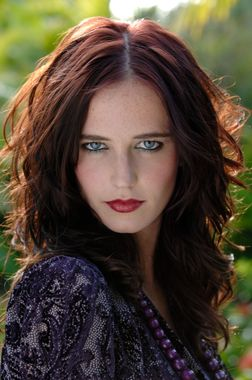

In [1]:
import cv2                                    # import de la biblio OpenCV
from google.colab.patches import cv2_imshow   # import pour visualisation des image sous google_Colab , 
                                              # Ne pas me demander pourquoi faire cette import dans collab sans lui pas d'affichage
image = cv2.imread('Eva_Green.jpg')           # ouverture de l'image
cv2_imshow(image)                             # affichage de L'image
cv2.waitKey(0)                                # attente d'aucune touch pour fermer l'image
cv2.destroyAllWindows()                       # detruire le cache image sous windows

# **Transformer une image en niveau de gris**
Il est possible de transformer une image couleur en niveau de gris avec la ligne de code suivant :

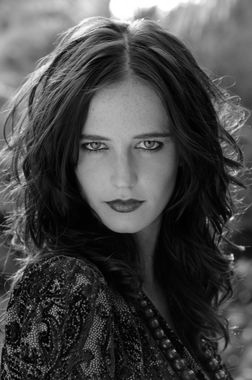

In [2]:
# Transformation de l'image en Nuance de Gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray) 

# **Qu'est ce que c'est la segmentation d'images?**
La segmentation permet d’isoler les différents objets présents dans une image.

Il existe différentes méthodes de segmentation : la classification, le clustering, les level-set, graph-cut, etc ....

Mais la plus simple est le seuillage, c’est pourquoi je vais te parler uniquement de celle-ci dans cette seconde partie.

Le seuillage est une opération qui permet de transformer une image en niveau de gris en image binaire (noir et blanc),

l'image obtenue est appelée masque binaire.

Le schéma ci-dessous illustre bien ce concept.


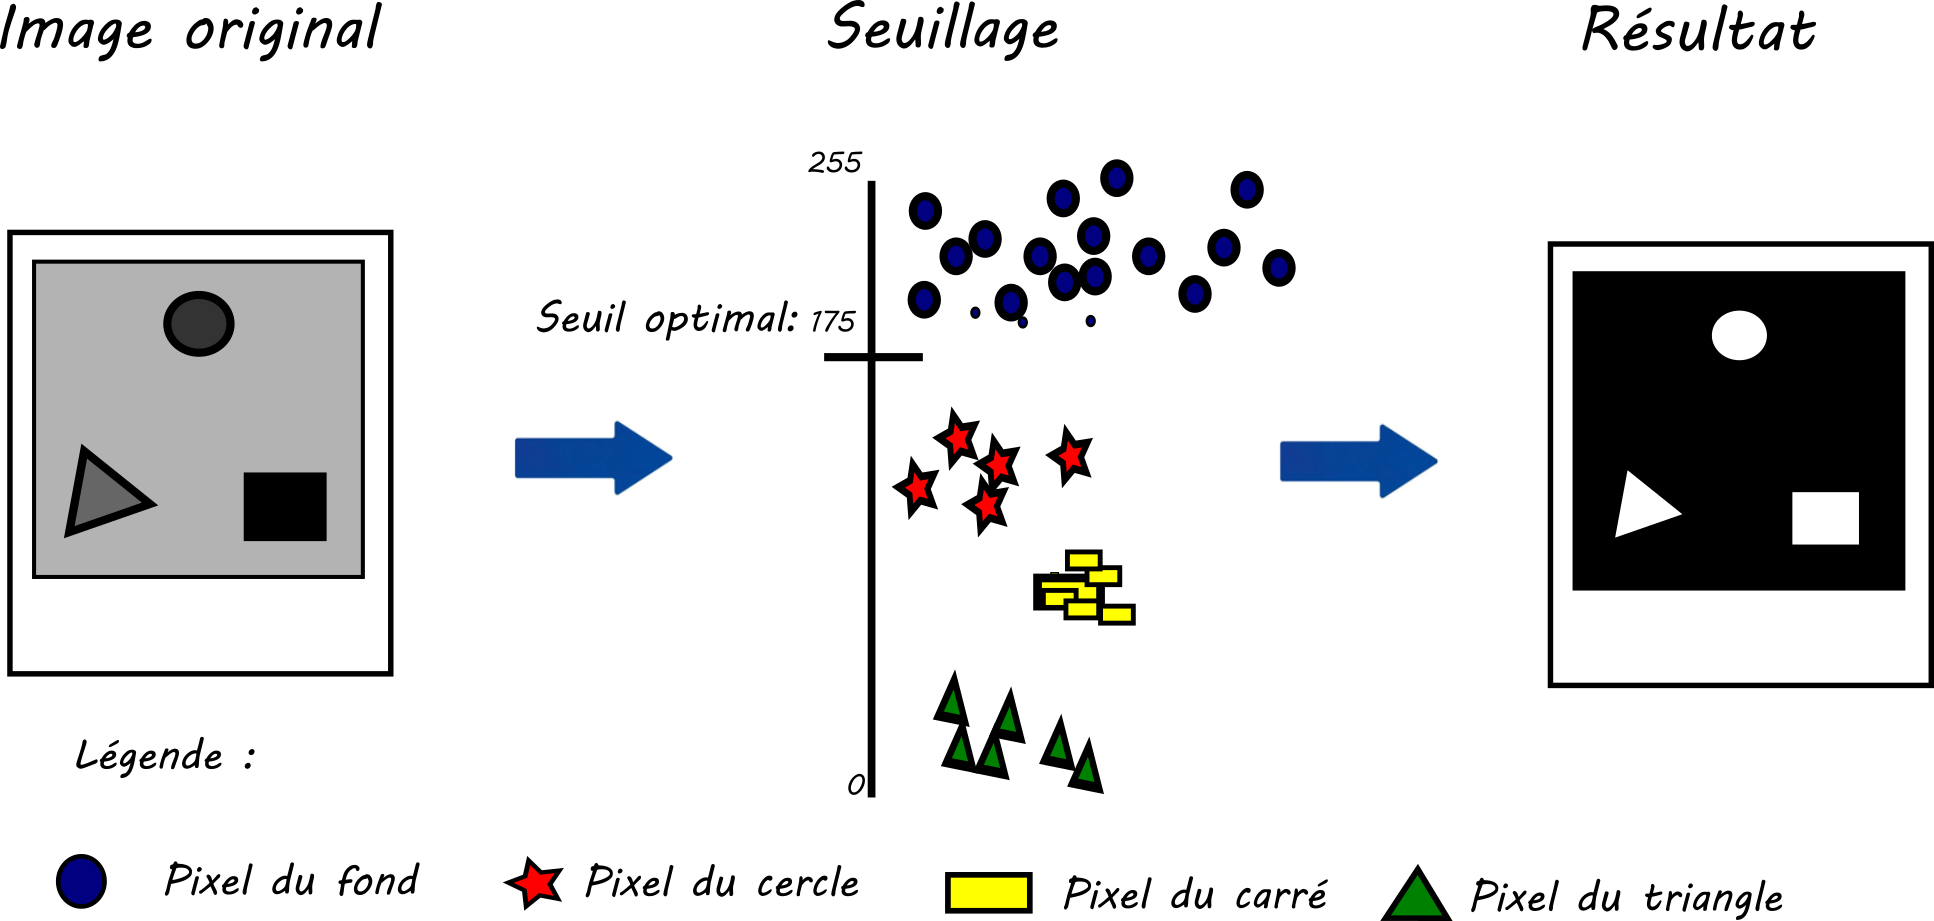

Il existe 2 méthodes pour seuiller une image, le seuillage manuel et le seuillage automatique.

# **Seuillage manuel**
Sur la l'illustration ci-dessus, trois formes sont présentes dans l’image originale.

Les pixels du rond sont représentés par des étoiles, ceux du carré par des rectangles jaunes, ceux du triangle par des triangles verts et les cercles bleus correspondent au fond.

Dans la figure, nous pouvons remarquer que tous les pixels correspondants du fond (rond bleu) ont une valeur supérieure à 175. Nous en déduisons que le seuil optimal est 175. En faisant cela, nous avons déterminé le seuil optimal manuellement.

Pour utiliser le seuil manuel avec OpenCV, il suffit d’appeler la fonction thresold


```
ret,th=cv2.threshold(img, seuil,couleur, option)
```

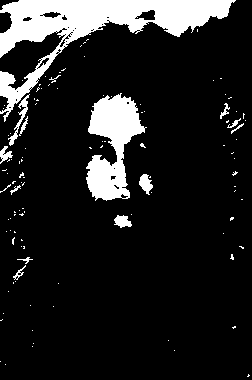

In [3]:
import numpy as np

ret,th=cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
cv2_imshow(th)
cv2.waitKey(0)
cv2.destroyAllWindows()

Traçons un rectangle autour de la tête

In [4]:
import numpy as np

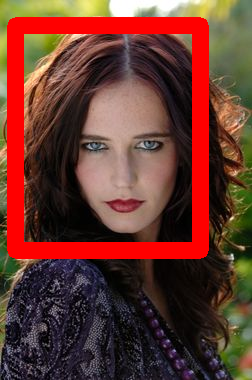

In [5]:
cv2.rectangle(image,(15,25),(200,250),(0,0,255),15)
cv2_imshow(image)

---
# **Exemple Code Complet**

Pour les personnes qui se demande a quoi cela peut servire je vous met si joint 
un code complet pour la detection de personne et d'objet 

```
#! usr/bin/env Python3              |
#! -*- conding:utf-8 -*-            |
# Usage  : Python3.6                |
# Author : Azazel                   |
# __________________________________|

#----------------------------------------------------------------

"""
 DocString: Visualisation OpenCV
    Note: 
        Recherche avec OpenCV dans le cadre de créé une securité et la detection de 
        D'objet.

        Objectife : 
            Faire tourner sur un rasberry pi pour peut de consomation 

    Why:
        Nous sommes le 31/10/2020 , Nous somme en confinement .
        Nous avons eu dans le monde Equestre Pas mal de soucie d'agression
        Parce que tous le monde peut aporté et crée une idée sans savoir codé.
        J'utilise le language Python car il est extrement compréhensible.
        Pas besoin d'etre Dev pour Lancer une idée et un POC.
"""
#----------------------------------------------------------------

# import 
import cv2               # Module OpenCV

#----------------------------------------------------------------

# une vidéo etant composé d'images nous travaillerons en premiers 
# sur une images fixe pour nos teste
# Chemin de L'image
path_file = Eva_Green.jpg"
#-----------------------------------------

# Creation de l'ouverture de l'img
# Lecture img
#img = cv2.imread(path_file)
# creation capture video
cap = cv2.VideoCapture(0)   # 0 Pour webcam integré 1,2,3... pour autre web cam
# Settings
cap.set(3,648)
cap.set(3,480)

# Creation de List Vide d'init
classNames = []
classFile = 'coco.names'
# ouverture fichier 
with open (classFile , 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
# Affichage de la list
#print(classNames)       # affichage liste

# creation des path et import pour visualisation ML
configPath = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
weightsPath = 'frozen_inference_graph.pb'

# Utilisation du resaux via doncifguration donner dans la Doc
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/127.5)
net.setInputMean((127.5, 127.5,127.5))
net.setInputSwapRB(True)

while True:
    
    # conf
    success, img = cap.read()
    classIds , confs, bbox = net.detect(img, confThreshold=0.5)
    # bon bah gogole est ton amis 
    # code status: -1072875772
    #print(classIds, bbox)

    if len(classIds) !=0:
        # configuration affichage rectangle dans l'image
        for classIds , confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
            # Creation du rectangle et definition couleur epaisseur de traits
            cv2.rectangle(img,box, color=(0,255,0), thickness=2) 
            # creation du texte label avec definition de sont emplacement dans la page 
            # comme la creation graphique sous word ou autre
            cv2.putText(img, classNames[classIds-1].upper(),(box[0]+10,box[1]+30),
                cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            
            # Bon pour le moment par de webCam Exterieur Je sais plus ce que j'en est fait.



    #visualisation 
    cv2.imshow("Output", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
```

---

#**Un simple serveur de cache pour diffuser la vidéo aux clients**

Vous pouvez les tester sur un ou plusieurs ordinateurs. Un pour la camera extern, tel que Raspberry Pi, ou toute plate-forme avec Python. Le code cache-server.py fera le gros du travail ici, car l'augmentation du nombre de threads demande plus de ressources au niveau du processeur. Il est donc préférable d'utiliser un PC multicœur pour la mise en œuvre du serveur de cache. Le PC côté client recevra la vidéo du serveur de cache. Il est supposé dans ce tutoriel que tous les appareils ont accès au réseau Wifi local. Pour connaître l'adresse IP de chaque pc, utilisez celle de l'adaptateur Wifi, la procédure pour différentes plateformes est ici:


## *Camera_Extern.py*

```
import socket, cv2, pickle, struct
import imutils
import cv2


server_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
host_name  = socket.gethostname()
host_ip = '192.168.79.102' # Enter Camera IP address
print('HOST IP:',host_ip)
port = 9999
socket_address = (host_ip,port)
server_socket.bind(socket_address)
server_socket.listen()
print("Listening at",socket_address)

def start_video_stream():
	client_socket,addr = server_socket.accept()
	camera = True
	if camera == True:
		vid = cv2.VideoCapture(0)
	else:
		vid = cv2.VideoCapture('videos/boat.mp4')
	try:
		print('CLIENT {} CONNECTED!'.format(addr))
		if client_socket:
			while(vid.isOpened()):
				img,frame = vid.read()

				frame  = imutils.resize(frame,width=320)
				a = pickle.dumps(frame)
				message = struct.pack("Q",len(a))+a
				client_socket.sendall(message)
				cv2.imshow("TRANSMITTING TO CACHE SERVER",frame)
				key = cv2.waitKey(1) & 0xFF
				if key ==ord('q'):
					client_socket.close()
					break

	except Exception as e:
		print(f"CACHE SERVER {addr} DISCONNECTED")
		pass

while True:
	start_video_stream()
````

## *cache-server.py*

```
import socket, cv2, pickle, struct
import imutils # pip install imutils
import threading
import cv2


server_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
host_name  = socket.gethostname()
host_ip = socket.gethostbyname(host_name)
print('HOST IP:',host_ip)
port = 9999
socket_address = (host_ip,port)
server_socket.bind(socket_address)
server_socket.listen()
print("Listening at",socket_address)

global frame
frame = None

def start_video_stream():
	global frame
	client_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
	host_ip = '192.168.79.102' # Here camera_extern IP 
	port = 9999
	client_socket.connect((host_ip,port))
	data = b""
	payload_size = struct.calcsize("Q")
	while True:
		while len(data) < payload_size:
			packet = client_socket.recv(4*1024) 
			if not packet: break
			data+=packet
		packed_msg_size = data[:payload_size]
		data = data[payload_size:]
		msg_size = struct.unpack("Q",packed_msg_size)[0]
		
		while len(data) < msg_size:
			data += client_socket.recv(4*1024)
		frame_data = data[:msg_size]
		data  = data[msg_size:]
		frame = pickle.loads(frame_data)
		cv2.imshow("RECEIVING VIDEO FROM DRONE",frame)
		key = cv2.waitKey(1) & 0xFF
		print(data)
		if key  == ord('q'):
			break
	client_socket.close()
	

thread = threading.Thread(target=start_video_stream, args=())
thread.start()

def serve_client(addr,client_socket):
	global frame
	try:
		print('CLIENT {} CONNECTED!'.format(addr))
		if client_socket:
			while True:
				a = pickle.dumps(frame)
				message = struct.pack("Q",len(a))+a
				client_socket.sendall(message)
				
	except Exception as e:
		print(f"CLINET {addr} DISCONNECTED")
		pass

   
while True:
	client_socket,addr = server_socket.accept()
	print(addr)
	thread = threading.Thread(target=serve_client, args=(addr,client_socket))
	thread.start()
	print("TOTAL CLIENTS ",threading.activeCount() - 2) # édité ici car un thread est déjà démarré avant



```

## *client.py*

```
import socket,cv2, pickle,struct

# create socket
client_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
host_ip = '192.168.124.15' # Here Require CACHE Server IP
port = 9999
client_socket.connect((host_ip,port)) # a tuple
data = b""
payload_size = struct.calcsize("Q")
while True:
	while len(data) < payload_size:
		packet = client_socket.recv(4*1024) # 4K
		if not packet: break
		data+=packet
	packed_msg_size = data[:payload_size]
	data = data[payload_size:]
	msg_size = struct.unpack("Q",packed_msg_size)[0]
	
	while len(data) < msg_size:
		data += client_socket.recv(4*1024)
	frame_data = data[:msg_size]
	data  = data[msg_size:]
	frame = pickle.loads(frame_data)
	cv2.imshow("RECEIVING VIDEO FROM CACHE SERVER",frame)
	key = cv2.waitKey(1) & 0xFF
	if key  == ord('q'):
		break
client_socket.close()
	
```

---

# **Transférer la vidéo sur les sockets de plusieurs clients**

nous ferons la programmation de socket pour plusieurs clients et un seul serveur. Il s'agit de créer plusieurs sockets client et de transmettre leurs vidéos à un serveur en Python. Le client.py utilise OpenCv pour accéder aux images vidéo depuis la webcam en direct ou via la vidéo MP4. Le code côté serveur exécute le multi-threading pour afficher l'image vidéo de chaque client connecté.

## Requirements:
```
pip3 install opencv-contrib-python
pip3 install pyshine
pip3 install numpy
pip3 install imutils
```
Le côté client doit connaître l'adresse IP du serveur. Le serveur et le client doivent être connectés au même routeur wifi.

## *client.py*

```
import socket,cv2, pickle,struct
import pyshine as ps # pip install pyshine
import imutils # pip install imutils
camera = True
if camera == True:
	vid = cv2.VideoCapture(0)
else:
	vid = cv2.VideoCapture('videos/mario.mp4')
client_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
host_ip = '192.168.1.11' 
port = 9999
client_socket.connect((host_ip,port))

if client_socket: 
	while (vid.isOpened()):
		try:
			img, frame = vid.read()
			frame = imutils.resize(frame,width=380)
			a = pickle.dumps(frame)
			message = struct.pack("Q",len(a))+a
			client_socket.sendall(message)
			cv2.imshow(f"TO: {host_ip}",frame)
			key = cv2.waitKey(1) & 0xFF
			if key == ord("q"):
				client_socket.close()
		except:
			print('VIDEO FINISHED!')
			break

```

## *server.py*

```
import socket, cv2, pickle, struct
import imutils
import threading
import pyshine as ps # pip install pyshine
import cv2

server_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
host_name  = socket.gethostname()
host_ip = socket.gethostbyname(host_name)
print('HOST IP:',host_ip)
port = 9999
socket_address = (host_ip,port)
server_socket.bind(socket_address)
server_socket.listen()
print("Listening at",socket_address)

def show_client(addr,client_socket):
	try:
		print('CLIENT {} CONNECTED!'.format(addr))
		if client_socket: # if a client socket exists
			data = b""
			payload_size = struct.calcsize("Q")
			while True:
				while len(data) < payload_size:
					packet = client_socket.recv(4*1024) # 4K
					if not packet: break
					data+=packet
				packed_msg_size = data[:payload_size]
				data = data[payload_size:]
				msg_size = struct.unpack("Q",packed_msg_size)[0]
				
				while len(data) < msg_size:
					data += client_socket.recv(4*1024)
				frame_data = data[:msg_size]
				data  = data[msg_size:]
				frame = pickle.loads(frame_data)
				text  =  f"CLIENT: {addr}"
				frame =  ps.putBText(frame,text,10,10,vspace=10,hspace=1,font_scale=0.7, background_RGB=(255,0,0),text_RGB=(255,250,250))
				cv2.imshow(f"FROM {addr}",frame)
				key = cv2.waitKey(1) & 0xFF
				if key  == ord('q'):
					break
			client_socket.close()
	except Exception as e:
		print(f"CLINET {addr} DISCONNECTED")
		pass
		
while True:
	client_socket,addr = server_socket.accept()
	thread = threading.Thread(target=show_client, args=(addr,client_socket))
	thread.start()
	print("TOTAL CLIENTS ",threading.activeCount() - 1)
	
				
```

---
# **Connectez la caméra Android à Python en utilisant OpenCV**

tutoriel très court sur la façon de connecter la caméra de votre téléphone Android à OpenCV. Cela peut être très utile pour ceux qui envisagent de créer des applications de traitement d'image qui utiliseront une caméra Android comme support. J'utiliserai Python 3.6 sur une machine Ubuntu 18.04, mais ne vous inquiétez pas, mes amis utilisateurs de Windows, le processus sera également le même.

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

installez l'application IP Webcam sur vos téléphones mobiles. Cela sera utilisé pour établir une communication entre votre téléphone Android et votre PC.
Après avoir installé l'application, assurez-vous que votre téléphone et votre PC sont connectés au même réseau. Exécutez l'application sur votre téléphone et cliquez sur Démarrer le serveur.
Astuce: faites défiler vers le bas, c'est tout en bas.

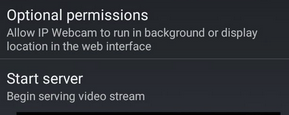

Après cela, votre caméra s'ouvrira avec une adresse IP en bas.

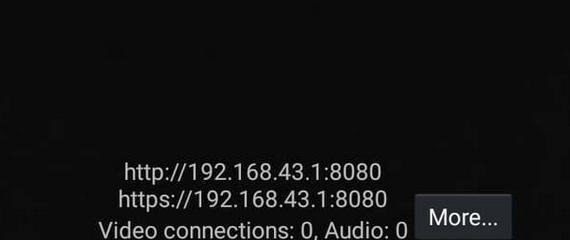

Prenez note de ces URL car nous les utiliserons plus tard.
Commençons à coder!

```
import urllib.request
import cv2
import numpy as np
import time
URL = "http://192.168.43.1:8080"
while True:
    img_arr = np.array(bytearray(urllib.request.urlopen(URL).read()),dtype=np.uint8)
    img = cv2.imdecode(img_arr,-1)
    cv2.imshow('IPWebcam',img)
    
    if cv2.waitKey(1):
        break
```

Bien sûr, utilisez l'URL affichée dans l'interface de votre webcam IP, remplacez-la puis exécutez le code. Dans quelques instants, une fenêtre de CV apparaîtra et fera de la magie. Pour fermer la fenêtre, appuyez simplement sur n'importe quelle touche.
C'est essentiellement comment connecter les téléphones Android à votre application Python. Les prochaines étapes seront pour vous. Cela peut impliquer une classification d'image en temps réel, une segmentation d'image, une détection d'objet ou une reconnaissance de visage, les possibilités sont presque illimitées. 

---
---

# **Reconnaisance Facial** :

pour les utilisateur de windows l'installation de la lib Dlib est souvent une galère. a force de recherche et de teste j'ai trouver une solution dans le Bile des codeurs perdu Stackoverflow.
la commande a rentré dans cotre terminal est la suivante :
```
pip install https://pypi.python.org/packages/da/06/bd3e241c4eb0a662914b3b4875fc52dd176a9db0d4a2c915ac2ad8800e9e/dlib-19.7.0-cp36-cp36m-win_amd64.whl#md5=b7330a5b2d46420343fbed5df69e6a3f

```

Créé un dossier "known_faces" qui sont les visages que vous connaissez , faire un dossier pour chaque personne que vous connaissé ou que vous savez l'identité.

Créé un dossier unknown_faces, qui contiendra et archivera les visages non connue 



```
import face_recognition
import os
import cv2


KNOWN_FACES_DIR = 'known_faces'
UNKNOWN_FACES_DIR = 'unknown_faces'
TOLERANCE = 0.6
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'cnn'  # default: 'hog', other one can be 'cnn' - CUDA accelerated (if available) deep-learning pretrained model
video = cv2.VideoCapture(0)


def name_to_color(name):
    color = [(ord(c.lower())-97)*8 for c in name[:3]]
    return color


print('Loading known faces...')
known_faces = []
known_names = []

for name in os.listdir(KNOWN_FACES_DIR):
    for filename in os.listdir(f'{KNOWN_FACES_DIR}/{name}'):
        image = face_recognition.load_image_file(f'{KNOWN_FACES_DIR}/{name}/{filename}')
        encoding = face_recognition.face_encodings(image)[0]
        known_faces.append(encoding)
        known_names.append(name)


print('Processing unknown faces...')

while True: 
    print(filename)
    ret, image = video.read()
    locations = face_recognition.face_locations(image, model=MODEL)
    encodings = face_recognition.face_encodings(image,)

    for face_encoding, face_location in zip(encodings, locations):
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
        match = None
        if True in results:
            match = known_names[results.index(True)]
            print(f' - {match} from {results}')
            print(f'Match Found : {match}')
            top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2])
            color = name_to_color(match)
            cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)
            
            top_left = (face_location[3], face_location[2])
            bottom_right = (face_location[1], face_location[2] + 22)
            cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
            cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS)

    # Show image
    cv2.imshow(filename, image)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
    cv2.destroyWindow(filename)

```